# Importing Libraries

In [38]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Importing The SHP file 

In [39]:
world = gpd.read_file("./geopandas/ne_110m_admin_0_countries.shp")

# Checking the Dataset 

In [40]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


# Plot Specific Countries or Regions

In [41]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


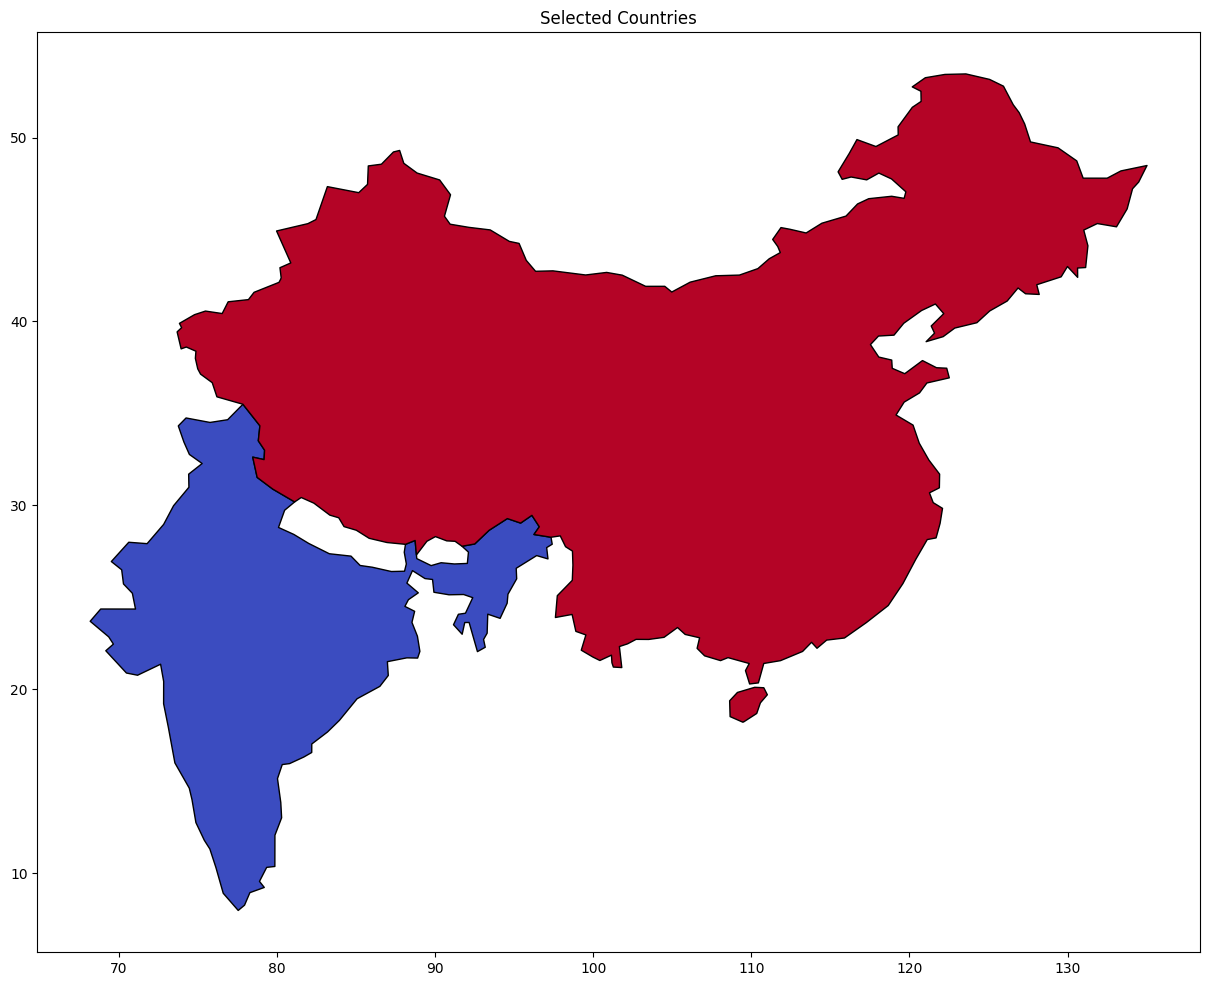

In [42]:
# Plot specific countries
countries = ["India", "United States", "China"]
selected_countries = world[world["NAME"].isin(countries)]

fig, ax = plt.subplots(figsize=(15, 15))
selected_countries.plot(ax=ax, cmap="coolwarm", edgecolor="black")
plt.title("Selected Countries")
plt.show()

# Add Points of Interest 

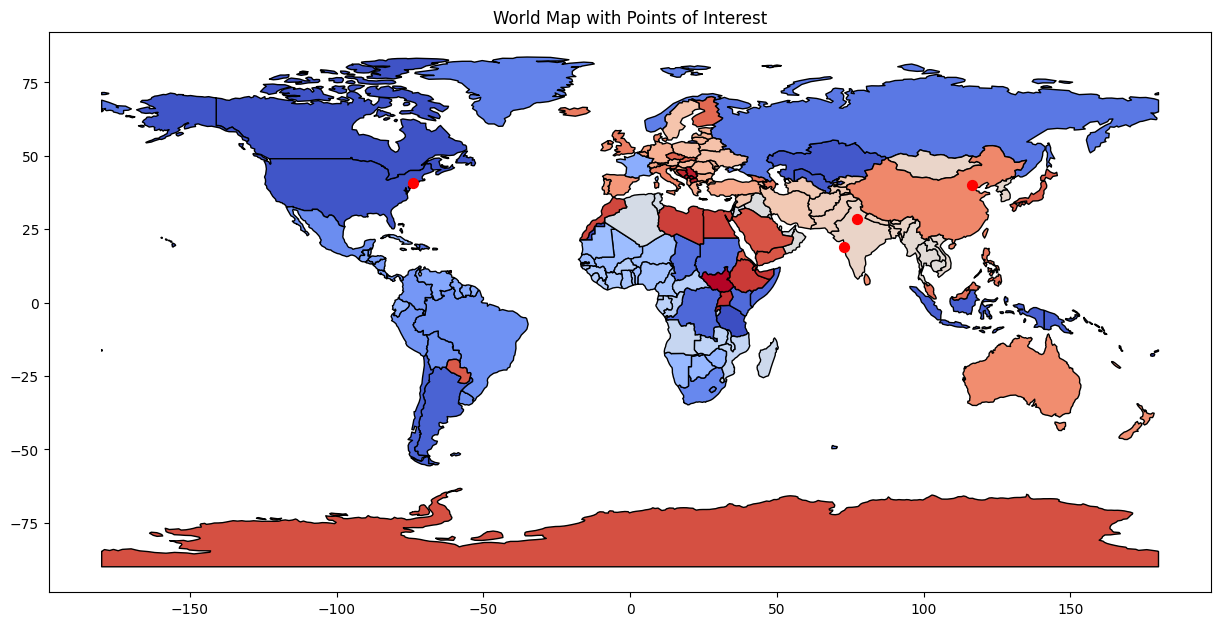

In [43]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame with points of interest
points = gpd.GeoDataFrame({
    'City': ['Delhi', 'Mumbai', 'New York', 'Beijing'],
    'Country': ['India', 'India', 'United States', 'China'],
    'geometry': [Point(77.2090, 28.6139), Point(72.8777, 19.0760), Point(-74.0060, 40.7128), Point(116.4074, 39.9042)]
})

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, cmap="coolwarm", edgecolor="black")
points.plot(ax=ax, color='red', markersize=50)
plt.title("World Map with Points of Interest")
plt.show()

# Highlight Specific Regions

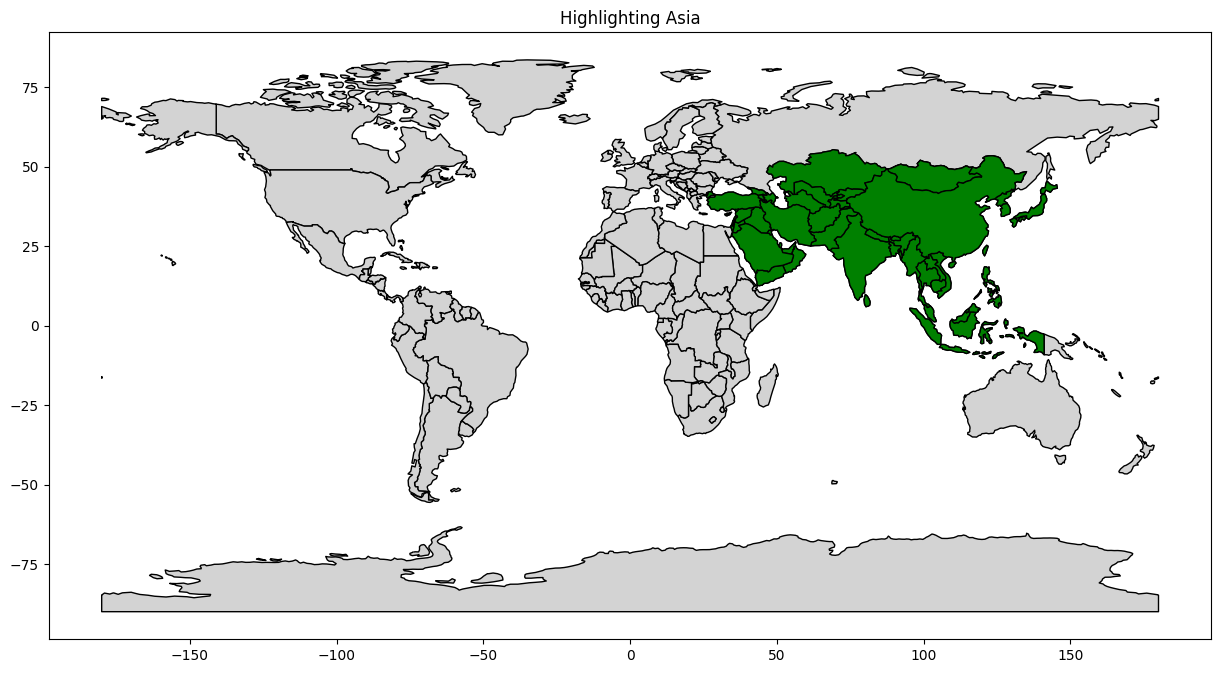

In [44]:
# Highlight Asia
asia = world[world["CONTINENT"] == "Asia"]

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color="lightgrey", edgecolor="black")
asia.plot(ax=ax, color="green", edgecolor="black")
plt.title("Highlighting Asia")
plt.show()

# Plot Population Data

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world GeoDataFrame (assuming you have already loaded it)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check column names
print(world.columns)

# Check if the population column exists
if 'population' in world.columns:
    column_name = 'population'
elif 'pop_est' in world.columns:
    column_name = 'pop_est'
else:
    print("The GeoDataFrame does not contain a population column.")
    column_name = None

# Plot population data if the column exists
if column_name:
    fig, ax = plt.subplots(figsize=(15, 15))
    world.plot(column=column_name, ax=ax, legend=True, cmap="OrRd", edgecolor="black")
    plt.title("World Population")
    plt.show()

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
The GeoDataFrame does not contain a population column.


# Create Interactive Maps

In [46]:
import folium

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add countries to the map
for _, row in world.iterrows():
    folium.GeoJson(row["geometry"], name=row["NAME"]).add_to(m)

# Save the map to an HTML file
m.save("world_map.html")

# Perform Spatial Joins

In [47]:
#  Example: Spatial join between world and points GeoDataFrame
joined = gpd.sjoin(world, points, how="inner", op="intersects")

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color="lightgrey", edgecolor="black")
joined.plot(ax=ax, color="blue", markersize=50)
plt.title("Spatial Join Example")
plt.show()

TypeError: sjoin() got an unexpected keyword argument 'op'

# Create Buffer Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_6180\43910049.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points["buffer"] = points.buffer(1)


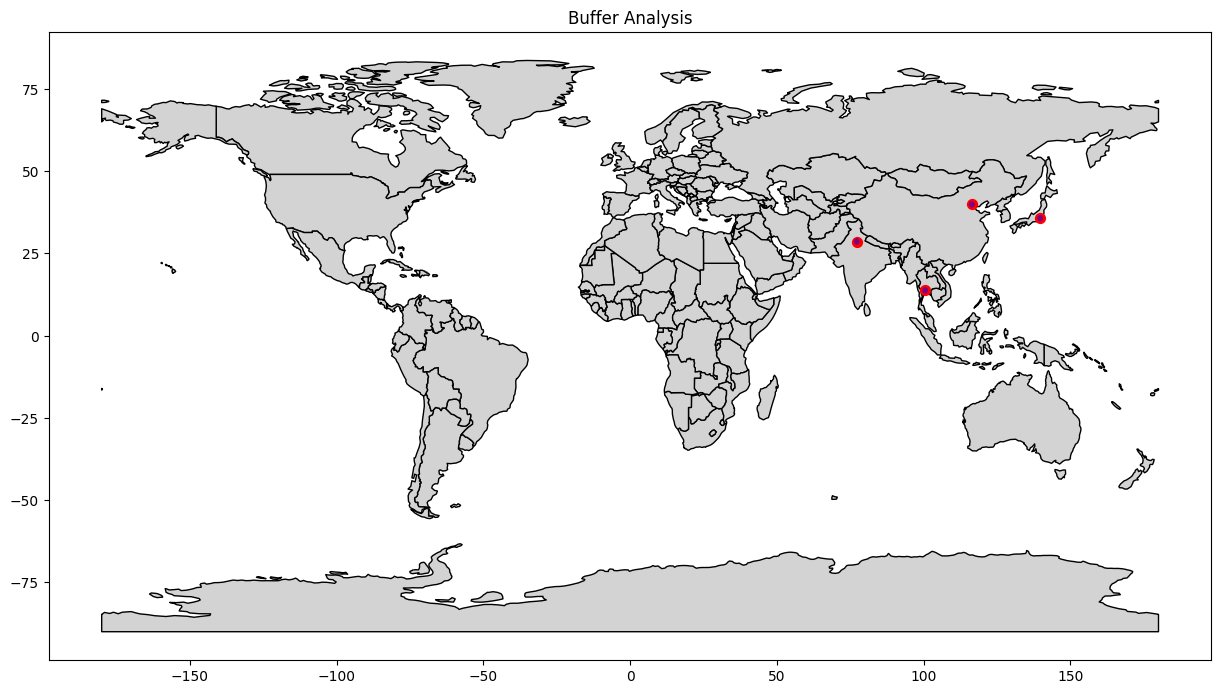

In [ ]:
# Create a buffer around points (e.g., 1 degree buffer)
points["buffer"] = points.buffer(1)

fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color="lightgrey", edgecolor="black")
points.plot(ax=ax, color="red", markersize=50)
points["buffer"].plot(ax=ax, color="blue", alpha=0.5)
plt.title("Buffer Analysis")
plt.show()